In [1]:
import torch
import torchvision
from torchvision import transforms
from skimage import io, transform
from torch import nn

import json

import numpy as np
import pandas as pd

from losses import *
from train import *
from plots import *
from gan import *
from data import *

from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1

import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16
LR = 3e-4
BETAS = 0.9, 0.999
LOGS_DIR = F"/content/drive/MyDrive/gan_logdir"
DEVICE='cuda'
LAMBDA = 0.5

In [3]:
data = FacesDataset("/content/drive/MyDrive/vgg_data/", transform=lambda x: (torch.tensor(transform.resize(np.array(x['image']), (160, 160))).permute((2, 0, 1)), x['class']))
train_data = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE, drop_last=True)

/content/drive/MyDrive/vgg_data/Nelly/757.jpg
/content/drive/MyDrive/vgg_data/Bingbing_Fan/794.jpg
/content/drive/MyDrive/vgg_data/Thad_Luckinbill/405.jpg
/content/drive/MyDrive/vgg_data/Andrew_Buchan/295.jpg


In [4]:
classifier = InceptionResnetV1(pretrained='casia-webface', device=DEVICE).eval()
classifier.classify = True

In [9]:
model = {"generator": Generator(in_channels=3, out_channels=3), 
         "discriminator": Discriminator(in_channels=3, image_size=160)}
attacked_model = classifier.eval()
criterion = {"generator_loss": WGANGeneratorLoss(), #GeneratorLoss(BATCH_SIZE, DEVICE), 
             "discriminator_loss": WGANDiscriminatorLoss(LAMBDA, DEVICE), #DiscriminatorLoss(BATCH_SIZE, DEVICE), 
             "attack_loss": AttackLoss(),
             "hinge_loss": HingeLoss(BATCH_SIZE, DEVICE)}
optimizer = {
    "generator_optimizer": torch.optim.Adam(model['generator'].parameters(), lr=LR, betas=BETAS),
    "discriminator_optimizer": torch.optim.Adam(model['discriminator'].parameters(), lr=LR, betas=BETAS),
}
loaders = {
    "train": torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE, drop_last=True),
}

In [10]:
runner = GANRunner(attacked_model, BATCH_SIZE, DEVICE, LOGS_DIR)

In [11]:
runner.train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    loaders=loaders,
    num_epochs=5,
    verbose=True,
    logdir=LOGS_DIR,
)

/usr/local/lib/python3.7/dist-packages/catalyst/core/runner.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  for k, v in self.batch_metrics.items()



train (1/5) attack loss: -6.231558322906494 | attack loss/mean: -6.231558322906494 | attack loss/std: 0.3200409904832005 | discriminator loss: 0.21313956379890442 | discriminator loss/mean: 0.21313956379890442 | discriminator loss/std: 0.19777051926724312 | generator loss: -0.653541624546051 | generator loss/mean: -0.653541624546051 | generator loss/std: 0.03286265464154707 | hinge loss: 83.8476791381836 | hinge loss/mean: 83.8476791381836 | hinge loss/std: 0.6388199588389987 | lr/discriminator_discriminator_optimizer: 0.0003 | lr/generator_generator_optimizer: 0.0003 | momentum/discriminator_discriminator_optimizer: 0.9 | momentum/generator_generator_optimizer: 0.9
* Epoch (1/5) 



train (2/5) attack loss: -6.2237548828125 | attack loss/mean: -6.2237548828125 | attack loss/std: 0.32608341451184947 | discriminator loss: -0.05939532816410065 | discriminator loss/mean: -0.05939532816410065 | discriminator loss/std: 0.04158201751872019 | generator loss: -0.7509051561355591 | generator loss/mean: -0.7509051561355591 | generator loss/std: 0.024179578662108906 | hinge loss: 83.96170806884766 | hinge loss/mean: 83.96170806884766 | hinge loss/std: 0.5249214168885648 | lr/discriminator_discriminator_optimizer: 0.0003 | lr/generator_generator_optimizer: 0.0003 | momentum/discriminator_discriminator_optimizer: 0.9 | momentum/generator_generator_optimizer: 0.9
* Epoch (2/5) 



train (3/5) attack loss: -6.139534950256348 | attack loss/mean: -6.139534950256348 | attack loss/std: 0.32084754318745384 | discriminator loss: -0.07795842736959457 | discriminator loss/mean: -0.07795842736959457 | discriminator loss/std: 0.05822073987593043 | generator loss: -0.8212783932685852 | generator loss/mean: -0.8212783932685852 | generator loss/std: 0.016117159608939616 | hinge loss: 84.79170989990234 | hinge loss/mean: 84.79170989990234 | hinge loss/std: 0.21711239479954136 | lr/discriminator_discriminator_optimizer: 0.0003 | lr/generator_generator_optimizer: 0.0003 | momentum/discriminator_discriminator_optimizer: 0.9 | momentum/generator_generator_optimizer: 0.9
* Epoch (3/5) 



train (4/5) attack loss: -6.1344523429870605 | attack loss/mean: -6.1344523429870605 | attack loss/std: 0.3220454900799916 | discriminator loss: -0.13329507410526276 | discriminator loss/mean: -0.13329507410526276 | discriminator loss/std: 0.03963287153616351 | generator loss: -0.8639845252037048 | generator loss/mean: -0.8639845252037048 | generator loss/std: 0.009750151215083007 | hinge loss: 84.56341552734375 | hinge loss/mean: 84.56341552734375 | hinge loss/std: 0.19661726242487979 | lr/discriminator_discriminator_optimizer: 0.0003 | lr/generator_generator_optimizer: 0.0003 | momentum/discriminator_discriminator_optimizer: 0.9 | momentum/generator_generator_optimizer: 0.9
* Epoch (4/5) 



train (5/5) attack loss: -6.125096321105957 | attack loss/mean: -6.125096321105957 | attack loss/std: 0.3212013738130022 | discriminator loss: -0.16873133182525635 | discriminator loss/mean: -0.16873133182525635 | discriminator loss/std: 0.04025255625052783 | generator loss: -0.889493465423584 | generator loss/mean: -0.889493465423584 | generator loss/std: 0.006052594154096605 | hinge loss: 84.42371368408203 | hinge loss/mean: 84.42371368408203 | hinge loss/std: 0.20871327362942968 | lr/discriminator_discriminator_optimizer: 0.0003 | lr/generator_generator_optimizer: 0.0003 | momentum/discriminator_discriminator_optimizer: 0.9 | momentum/generator_generator_optimizer: 0.9
* Epoch (5/5) 
Top best models:
/content/drive/MyDrive/gan_logdir/train.5.pth	5.0000


In [13]:
attacked_model = classifier 
generator_model = model['generator']

Text(0.5, 1.0, 'Fake: Prediction: 819, confidence: 0.9565532803535461')

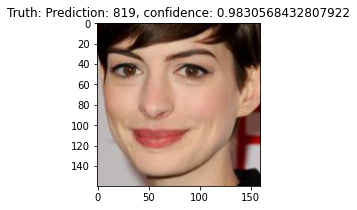

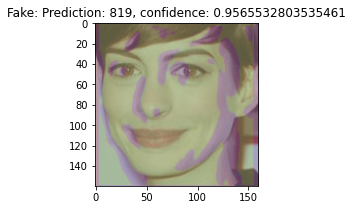

In [24]:
test_tensor =  torch.tensor(transform.resize(np.array(Image.open('./10.jpg')), (160, 160)), device='cuda', dtype=torch.float).permute((2, 0, 1)).unsqueeze(0)
test_img = test_tensor.cpu().detach().numpy()

true_confs = F.softmax(attacked_model(test_tensor), -1).cpu().detach().numpy()[0]
fake_confs = F.softmax(attacked_model((test_tensor + generator_model(test_tensor)) / 2), -1).cpu().detach().numpy()[0]

plt.figure(figsize=(3,3))
true_image = test_img[0].transpose((1, 2, 0))
plt.imshow(true_image, cmap='gray')
plt.title("Truth: Prediction: {}, confidence: {}".format(np.argmax(true_confs), true_confs.max()))

plt.figure(figsize=(3,3))
false_image = ((test_img + generator_model(test_tensor).cpu().detach().numpy()) / 2)[0].transpose((1, 2, 0))
plt.imshow(false_image, cmap='gray')
plt.title("Fake: Prediction: {}, confidence: {}".format(np.argmax(fake_confs), fake_confs.max()))

In [21]:
results = pd.read_csv(F"/content/drive/MyDrive/gan_logdir/train.csv", error_bad_lines=False, delimiter=',').drop(columns=['step']).astype(np.float64)
results

,attack loss,attack loss/mean,attack loss/std,discriminator loss,discriminator loss/mean,discriminator loss/std,generator loss,generator loss/mean,generator loss/std,hinge loss,hinge loss/mean,hinge loss/std,lr/discriminator_discriminator_optimizer,lr/generator_generator_optimizer,momentum/discriminator_discriminator_optimizer,momentum/generator_generator_optimizer
0,-6.231558,-6.231558,0.320041,0.213140,0.213140,0.197771,-0.653542,-0.653542,0.032863,83.847679,83.847679,0.638820,0.0003,0.0003,0.9,0.9
1,-6.223755,-6.223755,0.326083,-0.059395,-0.059395,0.041582,-0.750905,-0.750905,0.024180,83.961708,83.961708,0.524921,0.0003,0.0003,0.9,0.9
2,-6.139535,-6.139535,0.320848,-0.077958,-0.077958,0.058221,-0.821278,-0.821278,0.016117,84.791710,84.791710,0.217112,0.0003,0.0003,0.9,0.9
3,-6.134452,-6.134452,0.322045,-0.133295,-0.133295,0.039633,-0.863985,-0.863985,0.009750,84.563416,84.563416,0.196617,0.0003,0.0003,0.9,0.9
4,-6.125096,-6.125096,0.321201,-0.168731,-0.168731,0.040253,-0.889493,-0.889493,0.006053,84.423714,84.423714,0.208713,0.0003,0.0003,0.9,0.9


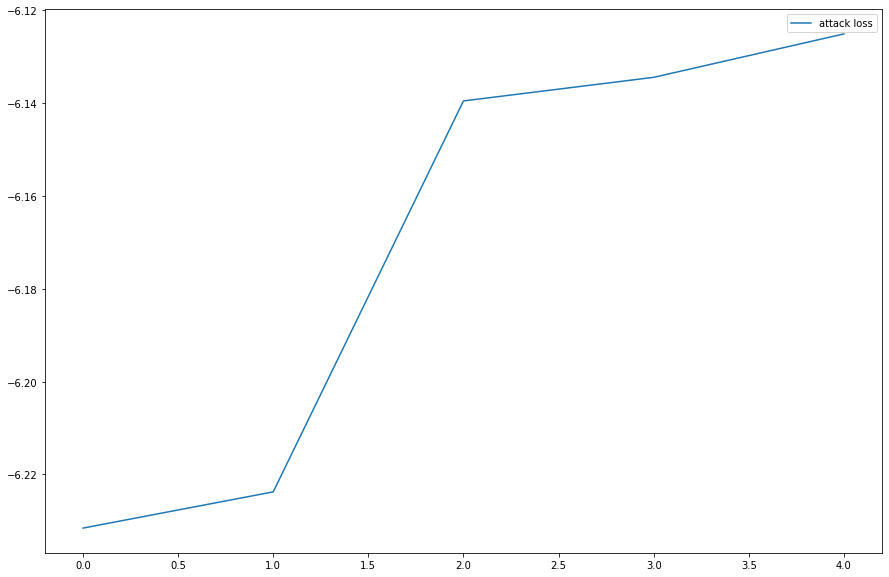

In [22]:
results[['attack loss']].plot(figsize=(15, 10))

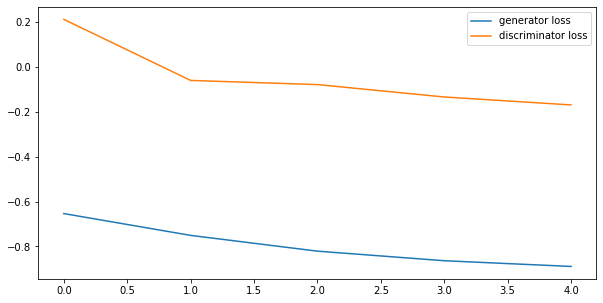

In [23]:
results[['generator loss', 'discriminator loss']].plot(figsize=(10, 5))